In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [31]:
df_train=pd.read_csv("dataset/titanic/train.csv")

In [32]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df_train.shape

(891, 12)

In [38]:
df_train=df_train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [39]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [40]:
def age_approx(cols):
    age =cols[0]
    Pclass=cols[1]
    
    if pd.isnull(age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return age

In [41]:
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [42]:
 df_train["Age"]=df_train[["Age","Pclass"]].apply(age_approx,axis=1)

In [43]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [44]:
df_train.dropna(inplace=True)

In [45]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [47]:
df_train_dummies=pd.get_dummies(df_train,columns=["Sex"])

In [48]:
df_train_dummies=pd.get_dummies(df_train_dummies,columns=["Embarked"])

In [49]:
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

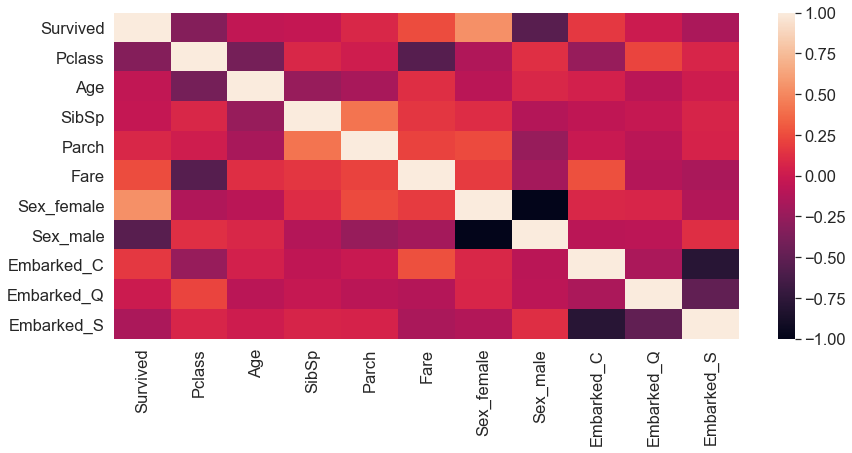

In [52]:
plt.figure(figsize=(14,6))
sns.heatmap(df_train_dummies.corr())

In [54]:
used_feature=["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [56]:
X=df_train_dummies[used_feature].values
y=df_train_dummies["Survived"]

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [59]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [60]:
LogReg = LogisticRegression()
LogReg.fit(xtrain,ytrain)

LogisticRegression()

In [61]:
y_pred =LogReg.predict(xtest)

In [63]:
metrics.confusion_matrix(ytest,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [65]:
metrics.accuracy_score(ytest,y_pred)

0.8314606741573034

In [67]:
len(xtest)

267

In [68]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [69]:
LogReg.coef_

array([[-1.0416583 , -0.03986563, -0.2418657 , -0.0405489 ,  1.19684229,
        -1.191862  ,  0.35142572, -0.03561634, -0.3108291 ]])

In [70]:
LogReg.intercept_

array([3.6503613])

In [71]:
df_train_dummies[used_feature].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [72]:
LogReg.predict_proba(xtest)

array([[0.26543762, 0.73456238],
       [0.39670167, 0.60329833],
       [0.94739252, 0.05260748],
       [0.25946287, 0.74053713],
       [0.94405682, 0.05594318],
       [0.13498849, 0.86501151],
       [0.33318424, 0.66681576],
       [0.51891172, 0.48108828],
       [0.78162823, 0.21837177],
       [0.40735921, 0.59264079],
       [0.74014692, 0.25985308],
       [0.21156393, 0.78843607],
       [0.74871108, 0.25128892],
       [0.14562753, 0.85437247],
       [0.86463688, 0.13536312],
       [0.36950158, 0.63049842],
       [0.89368398, 0.10631602],
       [0.29766694, 0.70233306],
       [0.17634635, 0.82365365],
       [0.39887297, 0.60112703],
       [0.90490942, 0.09509058],
       [0.55285824, 0.44714176],
       [0.86434636, 0.13565364],
       [0.93739461, 0.06260539],
       [0.51638224, 0.48361776],
       [0.51590185, 0.48409815],
       [0.03915836, 0.96084164],
       [0.8692353 , 0.1307647 ],
       [0.89806853, 0.10193147],
       [0.32523047, 0.67476953],
       [0.